# Part II - (investigate Ford GoBike System Data)
## by (MoAlsekait)

## Investigation Overview

Different usage of plots to describe and to give findings of the data, describe relationships between different variables and how they relate to each other. male subscribers between the age of 25 till 34 are the most of the members also they're the most spent duration of time and most of the members prefer not to share bike for all the trip even though the users like to use the service between the time 7-9 in the morning and 16-18 in the evening during the weekdays and less for the weekends which prefer that most of the users use the service for work purpose.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I will explore the dataset to understand the relationships for all data in order, which is gathering cleaning as the Wrangling part then there will be exploration as uni, bi and multi explorations to understand this dataset more.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
df= pd.read_csv("201902-fordgobike-tripdata.csv")
df['member_age'] = 2019 - df['member_birth_year']

df['duration_min'] = df['duration_sec'] / 60
df['duration_hours'] = df['duration_min'] / 60

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hours'] = df.start_time.dt.strftime('%H')
df['start_days'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Xdays = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df.start_days = df.start_days.astype(Xdays)

df.start_hours = df.start_hours.astype('int')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hours,start_date,start_hours,start_days,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,35.0,869.750000,14.495833,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,NaN,708.683333,11.811389,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,47.0,1030.900000,17.181667,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,30.0,608.166667,10.136111,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,45.0,26.416667,0.440278,2019-02-28,23,Thursday,February


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1: Start hours per count)




> We can notice that people like to use the service at the beginning of the morning mostly 8 clock and close to it like 7 or 9 clock in the morning to the end of the day work which is 17 which interesting theory of what is the purpose of being mostly used by people.

Text(0, 0.5, 'Count')

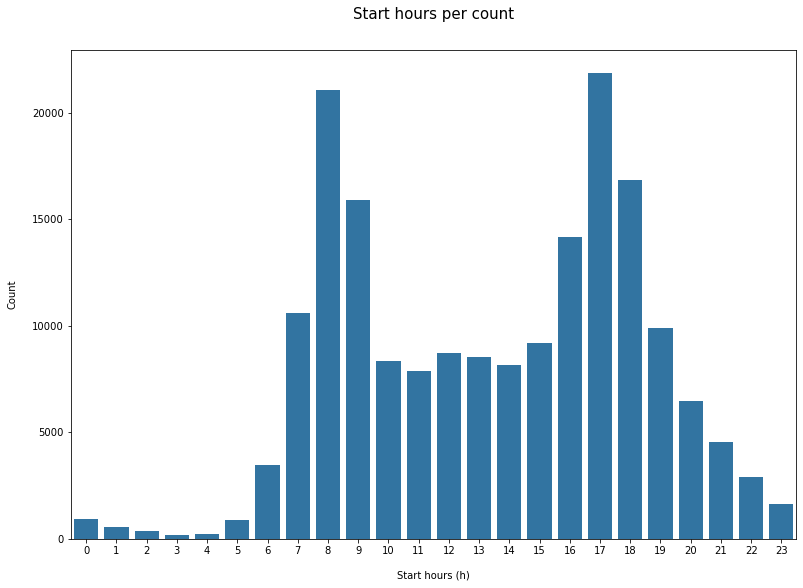

In [19]:
base_color = sb.color_palette()[0]
fig = plt.figure(figsize=(13, 9))
ax = fig.add_axes([.125, .125, .775, .755])
sb.countplot(data = df, x = 'start_hours', color=base_color);
plt.xticks(rotation=0);
plt.title('Start hours per count', y=1.05, fontsize=15)
plt.xlabel('Start hours (h)', labelpad=15)
plt.ylabel('Count', labelpad=15)

## (Visualization 2: Members age per count)

> it seems that people in their thirties are the most taken tripes than the earliest twenties or the older

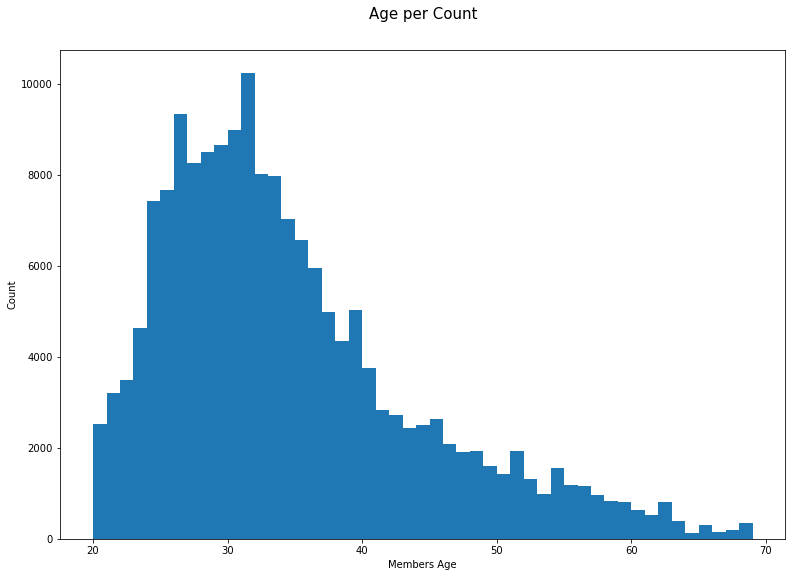

In [20]:
Xbin = np.arange(20, 70, 1)
fig = plt.figure(figsize=(13, 9))
plt.hist(data = df, x = 'member_age', bins = Xbin);

plt.title("Age per Count", y=1.05, fontsize=15)
plt.xlabel('Members Age')
plt.ylabel('Count');

## (Visualization 3: percentage of User type and member genders)

> the percentage of males that use the service is more than the other genders with almost 75%, then female members with 23% as second after that the others with only 2% which is the lowest 

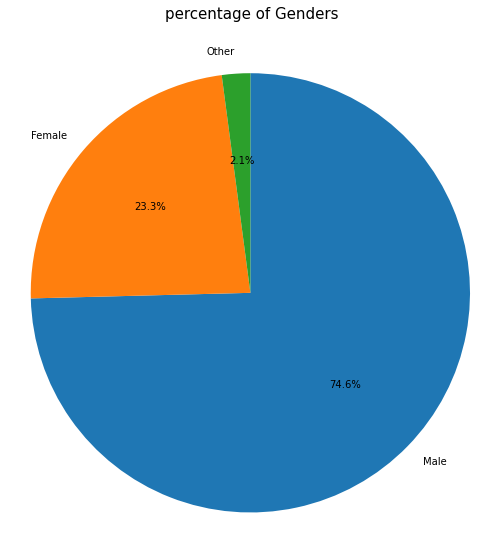

In [21]:
gender_counts = df['member_gender'].value_counts()
fig = plt.figure(figsize=(13, 9))
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90,autopct= '%1.1f%%', counterclock = False);
plt.axis('square')
plt.title("percentage of Genders", y=1.05, fontsize=15)
plt.show()

## (Visualization 4: user type per count)

> We can notice here that the Subscribers are way more than the customers with almost eight times 

Text(0, 0.5, 'Count')

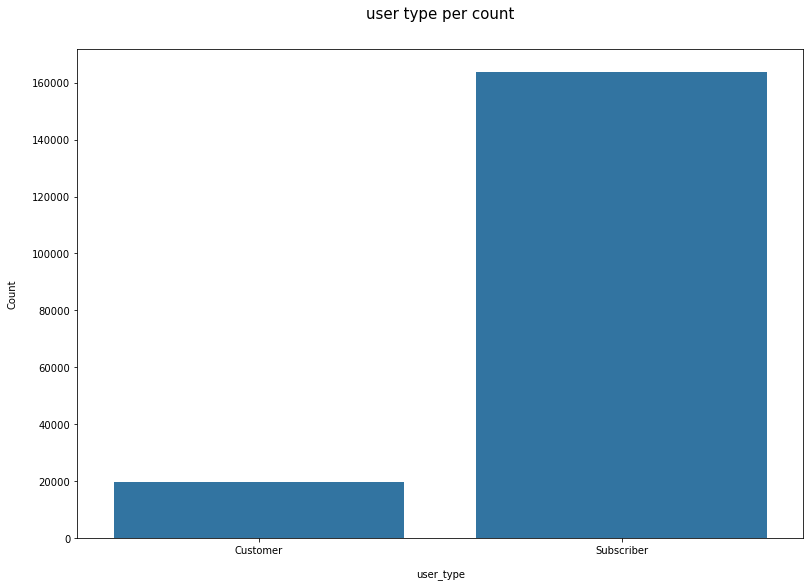

In [22]:
base_color = sb.color_palette()[0]
fig = plt.figure(figsize=(13, 9))
ax = fig.add_axes([.125, .125, .775, .755])
sb.countplot(data = df, x = 'user_type', color=base_color);
plt.xticks(rotation=0);
plt.title('user type per count', y=1.05, fontsize=15)
plt.xlabel('user_type', labelpad=15)
plt.ylabel('Count', labelpad=15)

## (Visualization 5: Week days per counts for user types )

> We can notice the difference between both of the user types, but we can see that both of the user types increase for Thursday, unlike Subscriber which increases on the weekdays and decreases at the weekend, the Customer  has kind of stable rate for all days

Text(0, 0.5, 'Count')

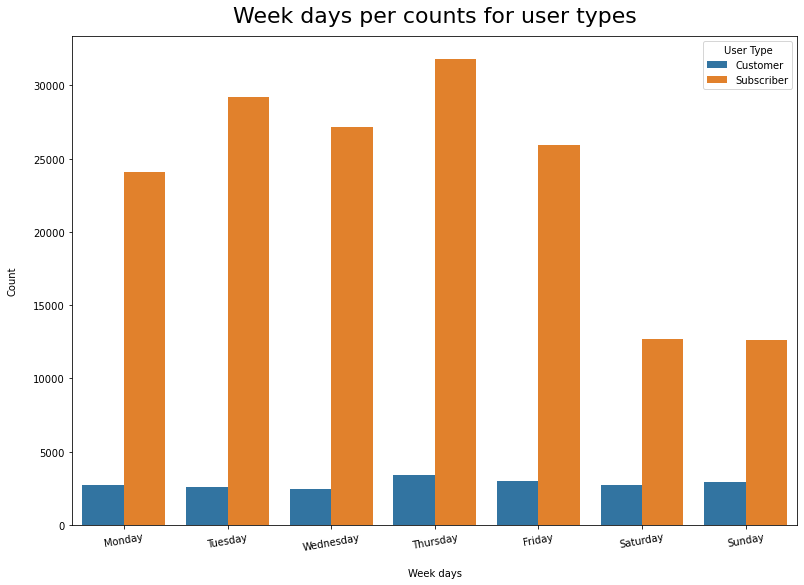

In [23]:
plt.figure(figsize=(13,9))
x=sb.countplot(data = df, x = 'start_days', hue = 'user_type')
x.legend(title='User Type');
plt.xticks(rotation=10);
plt.title('Week days per counts for user types', fontsize=22, y=1.015)
plt.xlabel('Week days', labelpad=16)
plt.ylabel('Count', labelpad=16)

## (Visualization 6: Mean of Duration in Minute per user type)

> We can see here the mean duration in minutes of customer are higher than the subscriber even though, and this tills that customer use the service with more duration than subscriber.

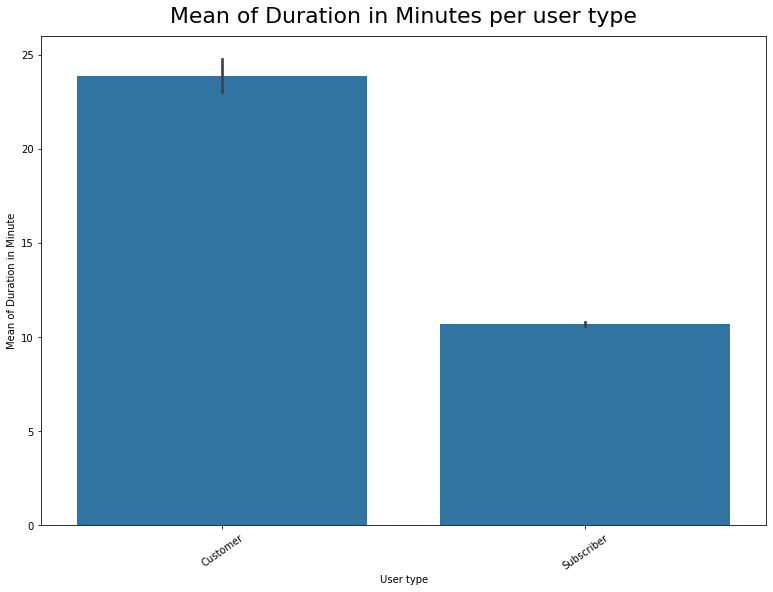

In [24]:
plt.figure(figsize=(13,9))
sb.barplot(data=df, x='user_type', y='duration_min', color=base_color);
plt.xticks(rotation=35);
plt.title("Mean of Duration in Minutes per user type", fontsize=22, y=1.015)
plt.xlabel('User type');
plt.ylabel('Mean of Duration in Minute');

## (Visualization 7: Mean of Duration in Minutes per Genders)

> We can see here the mean duration in minutes of Others are higher than the females and males even though it has the least number.

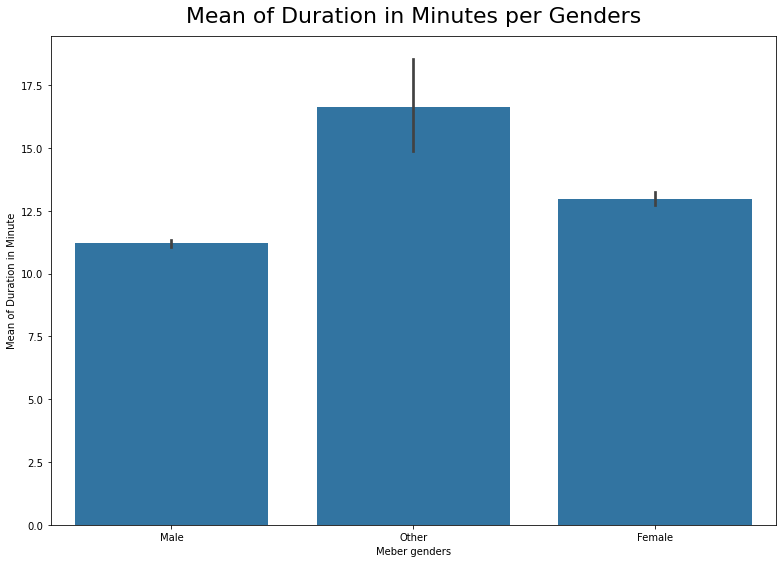

In [25]:
plt.figure(figsize=(13,9))
sb.barplot(data=df, x='member_gender', y='duration_min', color=base_color);
plt.title("Mean of Duration in Minutes per Genders", fontsize=22, y=1.015)
plt.xlabel('Meber genders');
plt.ylabel('Mean of Duration in Minute');

## (Visualization 8: trip duration in minutes for user type per age )

> The relation between the user age and the duration in minutes for user types was really close to each other that both the customer and the subscribers rude the bike for longer duration at the younger ages between 25 to 40 and less duration than the older people but the difference is the subscriber's ride bikes for more durations at the older ages between 50 and 80 and that's might be because of two factors that the number of subscribers is more than the customers also we saw that customers ride bikes for a longer duration than the subscribers, probably because old people prefer to be subscribers than customers.

Text(0.5, 0.98, 'trip duration for user type per ages ')

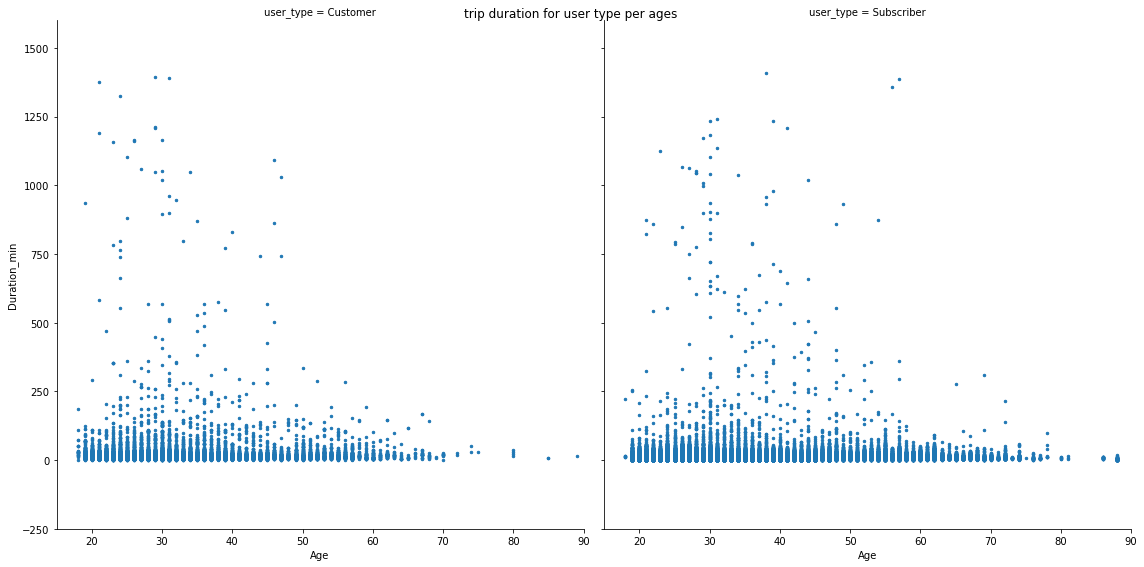

In [26]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap =2, size = 8,
                 xlim = [15, 90], ylim = [-250, 1600])
user_type.map(plt.scatter, 'member_age', 'duration_min', alpha= 1, s=6)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_min')
user_type.fig.suptitle('trip duration for user type per ages ')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [27]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 791180 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filen

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


## Conclusion

> I explored the dataset to understand the relationships for all data in order, which is gathering, cleaning, and assessing as the wrangling part, I managed to add a lot of columns that have extracted like member age from the member date of birth and from duration in second I managed to add more columns like duration in hours and in minutes also from the start date I managed to extract the month which was later all data at the same month also the start day of weeks and the start hours of the day. After this was the univariate exploration part which is to explore the relationship for one column which was rich knowledge and helpful for the next parts. Then the Bivariate exploration part is the part where you find the relationship between two columns which is the part that I worked on the most because it's a really important part. For last there was the multivariate part which is the part where I explore the relationship between more than one or two, for this part the relationship was clear and it was making sense because of the previous part and that comes to me that all of these parts of exploration are important to make everything clear for the next part of the exploration.